<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Code and Uploads

In [27]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats
from scipy.stats import f_oneway
from scipy.stats import skew
from scipy.stats import kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices, EvalEnvironment, ModelDesc, Term, EvalFactor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm #Instead of just statsmodels.api
from statsmodels.formula.api import ols

!pip install libpysal esda splot
import libpysal
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import matplotlib.pyplot as plt
from libpysal.weights import Queen

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.cm as cm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import requests

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

!pip install adjustText
from adjustText import adjust_text

!pip install tabula-py
import tabula

import datetime

## Import

### OCD List



In [2]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gradschoolcam/refs/heads/main/csv_files/OCD%2020250418.csv", "OCD.csv")
OCD = pd.read_csv('OCD.csv')
OCD.head()

,Rutgers ID (RUID),Application ID,Email,Phone,Program,Form Submit Date,Application Status,Prelim Review Date,Graduate School Staff,Comments
0,246000420,2447220,sumanthgangadara1408@gmail.com,+91 7095098359,public affairs phd,04/18/25 12:33 PM,Pending Preliminary Review,04/18/25,EW,MS not PhD
1,245006026,2432723,nderitugracenjoki@gmail.com,+250793764440,Business & Science (M.B.S.)\nChemistry & Molec...,04/18/25 7:08 AM,Pending Preliminary Review,NaN,NaN,NaN
2,206009876,2168240,pxpsclz@gmail.com,9085911014,Biology (M.S.)\nBusiness & Science (M.B.S.),04/17/25 12:57 PM,Pending Preliminary Review,NaN,NaN,NaN
3,245008337,2433545,leslie@leslienolandesign.com,7322807989,Emerging Media | Digital Studies (M.P.S. | M.A.),04/17/25 9:16 AM,In Salesforce,04/17/25,EW,only has personal statement
4,235005854,2234812,p.kush.adhikary@gmail.com,+919695099641,History (M.A.)\nLiberal Studies (M.A.),04/17/25 8:44 AM,In Salesforce,04/17/25,EW,History Only


# Data Management

## OCD

In [4]:
OCD.dtypes

,0
Rutgers ID (RUID),object
Application ID,object
Email,object
Phone,object
Program,object
Form Submit Date,object
Application Status,object
Prelim Review Date,object
Graduate School Staff,object
Comments,object


## Orgnizing the Data for a Line Graph

In [13]:
#I need to convert the date field to date from object
OCD['Form Submit Date'] = pd.to_datetime(OCD['Form Submit Date'], format='%m/%d/%y %I:%M %p')
OCD.head(2)

,Rutgers ID (RUID),Application ID,Email,Phone,Program,Form Submit Date,Application Status,Prelim Review Date,Graduate School Staff,Comments,Year,Month-Day
0,246000420,2447220,sumanthgangadara1408@gmail.com,+91 7095098359,public affairs phd,2025-04-18 12:33:00,Pending Preliminary Review,04/18/25,EW,MS not PhD,2025.0,04-18
1,245006026,2432723,nderitugracenjoki@gmail.com,+250793764440,Business & Science (M.B.S.)\nChemistry & Molec...,2025-04-18 07:08:00,Pending Preliminary Review,NaN,NaN,NaN,2025.0,04-18


In [12]:
#I need to get rid of the time.
OCD['Year'] = OCD['Form Submit Date'].dt.year
OCD['Month-Day'] = OCD['Form Submit Date'].dt.strftime('%m-%d')
OCD.head(2)

,Rutgers ID (RUID),Application ID,Email,Phone,Program,Form Submit Date,Application Status,Prelim Review Date,Graduate School Staff,Comments,Year,Month-Day
0,246000420,2447220,sumanthgangadara1408@gmail.com,+91 7095098359,public affairs phd,2025-04-18 12:33:00,Pending Preliminary Review,04/18/25,EW,MS not PhD,2025.0,04-18
1,245006026,2432723,nderitugracenjoki@gmail.com,+250793764440,Business & Science (M.B.S.)\nChemistry & Molec...,2025-04-18 07:08:00,Pending Preliminary Review,NaN,NaN,NaN,2025.0,04-18


In [14]:
#I want to count the days and year for the graph
daily_counts = OCD.groupby(['Year', 'Month-Day']).size().reset_index(name='Count')
daily_counts.head(2)

,Year,Month-Day,Count
0,2022.0,03-30,15
1,2022.0,03-31,21


In [21]:
OCD_Time = (
    daily_counts
    .pivot(index='Month-Day', columns='Year', values='Count')
    .fillna(0)
    .sort_index()
)

In [22]:
# Reconstruct datetime using dummy year
OCD_Time.index = pd.to_datetime('2000-' + OCD_Time.index)

# Resample to weekly sums
OCD_Time = OCD_Time.resample('W-MON').sum()

In [23]:
OCD_Time = OCD_Time.cumsum()

In [24]:
#I want to get rid of the Nans
OCD_Time = OCD_Time.fillna(0)
OCD_Time.head(2)

Year,2022.0,2023.0,2024.0,2025.0
Month-Day,,,,
2000-01-24,0.0,1.0,0.0,0.0
2000-01-31,0.0,40.0,70.0,0.0


In [38]:
#I want to get rid of the decimal in the columns
OCD_Time.columns = OCD_Time.columns.astype(int)
OCD_Time.head(2)

,2022,2023,2024,2025
2000-01-01,0.0,0.0,0.0,0.0
2000-01-24,0.0,1.0,0.0,0.0


In [28]:
#I want the plot to include a dynamic day function for the visualization.
today = datetime.date.today()
today_2000 = pd.to_datetime(f'2000-{today.month:02d}-{today.day:02d}')

In [35]:
# Add a baseline row at 2000-01-01 with 0 submissions for each year
baseline = pd.DataFrame(
    {year: 0 for year in OCD_Time.columns},
    index=[pd.to_datetime('2000-01-01')]
)

# Prepend to the main DataFrame
OCD_Time = pd.concat([baseline, OCD_Time]).sort_index()

In [54]:
from datetime import date
import pandas as pd

# Get current and comparison years
current_year = date.today().year
last_year = current_year - 1
comparison_years = [current_year - 1, current_year - 2, current_year - 3]

# Create "today" key based on dummy 2000 calendar
today_key = pd.to_datetime(f'2000-{date.today().month:02d}-{date.today().day:02d}')
# Find the closest date in OCD_Time index that is <= today_key
available_dates = OCD_Time.index[OCD_Time.index <= today_key]
if len(available_dates) == 0:
    today_key = OCD_Time.index[0]
else:
    today_key = available_dates[-1]

# Extract values at today's point in the year
current_value = OCD_Time.at[today_key, current_year] if current_year in OCD_Time.columns and today_key in OCD_Time.index else 0
last_year_value = OCD_Time.at[today_key, last_year] if last_year in OCD_Time.columns and today_key in OCD_Time.index else 0

# Three-year average (excluding current year)
past_values = [
    OCD_Time.at[today_key, y] if y in OCD_Time.columns and today_key in OCD_Time.index else 0
    for y in comparison_years
]
three_year_avg = sum(past_values) / len(past_values) if past_values else 0

# Helper for percent change
def pct_change(new, old):
    if old == 0:
        return float('inf') if new > 0 else 0
    return (new - old) / old * 100

change_vs_last = pct_change(current_value, last_year_value)
change_vs_avg = pct_change(current_value, three_year_avg)

# Format title
title_text = (
    f"OCD’s {change_vs_last:.1f}% Compared with Last Year "
    f"and {change_vs_avg:.1f}% Compared to the Three-Year Average"
)

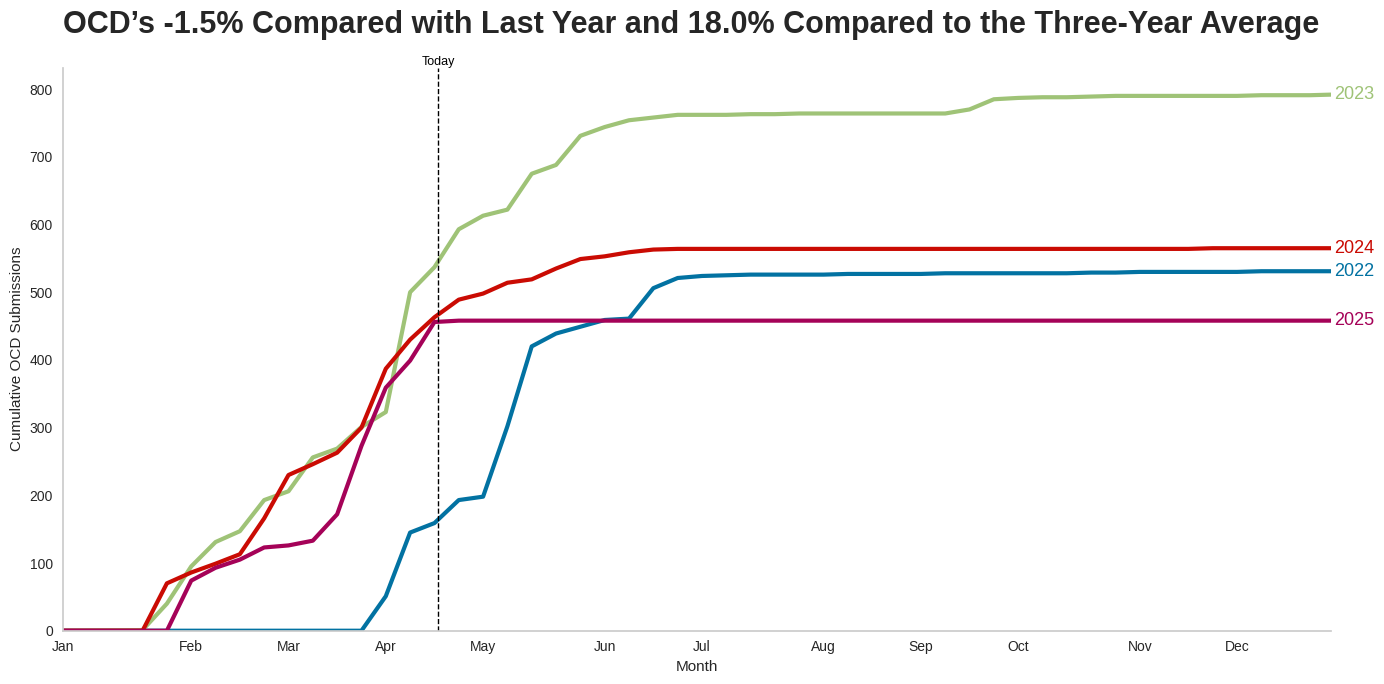

In [59]:
plt.figure(figsize=(14, 7))

for year in OCD_Time.columns:
    line, = plt.plot(
        OCD_Time.index,
        OCD_Time[year],
        label=str(year),
        linewidth=3
    )

    plt.text(
        x=OCD_Time.index[-1],
        y=OCD_Time[year].iloc[-1],
        s=str(year),
        va='center',
        ha='left',
        fontsize=13,
        color=line.get_color()  # Dynamically match line color
    )

# Dynamic "Today" vertical line
today = datetime.date.today()
today_2000 = pd.to_datetime(f'2000-{today.month:02d}-{today.day:02d}')
plt.axvline(x=today_2000, color='black', linestyle='--', linewidth=1)
plt.text(
    x=today_2000,
    y=plt.ylim()[1],
    s='Today',
    ha='center',
    va='bottom',
    fontsize=9,
    color='black'
)

# Month name ticks
month_starts = OCD_Time.index.to_series().groupby(OCD_Time.index.to_period("M")).first()
month_labels = month_starts.dt.strftime('%b')
plt.xticks(ticks=month_starts, labels=month_labels)

# Clean look: no top/right spine or grid
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title(title_text, loc='left', fontsize=22, pad=25,weight='bold')
plt.xlabel("Month")
plt.ylabel("Cumulative OCD Submissions")
plt.xlim(pd.to_datetime('2000-01-01'), pd.to_datetime('2000-12-31'))
plt.tight_layout()
plt.margins(x=0)
plt.ylim(bottom=0)
plt.margins(x=0)  # No horizontal margin
plt.ylim(bottom=0)  # Force y-axis to start at 0
plt.show()